In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\mohit\OneDrive\Desktop\DS\ML\L R\cleaned_dataset.csv")

In [5]:
df.head()

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


In [17]:
df.columns

Index(['brand', 'price', 'reting', 'is_5g', 'is_nfc', 'is_ir_blaster',
       'processor_brand', 'core', 'proccessor_speed', 'ram', 'internal_memory',
       'battery_size', 'fast_charge', 'charging_speed', 'rear_mp', 'front_mp',
       'os', 'display_size', 'refresh_rate'],
      dtype='object')

In [19]:
df.shape

(911, 19)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             911 non-null    object 
 1   price             911 non-null    int64  
 2   reting            911 non-null    float64
 3   is_5g             911 non-null    int64  
 4   is_nfc            911 non-null    float64
 5   is_ir_blaster     911 non-null    int64  
 6   processor_brand   911 non-null    object 
 7   core              911 non-null    int64  
 8   proccessor_speed  911 non-null    float64
 9   ram               911 non-null    float64
 10  internal_memory   911 non-null    int64  
 11  battery_size      911 non-null    int64  
 12  fast_charge       911 non-null    int64  
 13  charging_speed    911 non-null    int64  
 14  rear_mp           911 non-null    int64  
 15  front_mp          911 non-null    int64  
 16  os                911 non-null    object 
 1

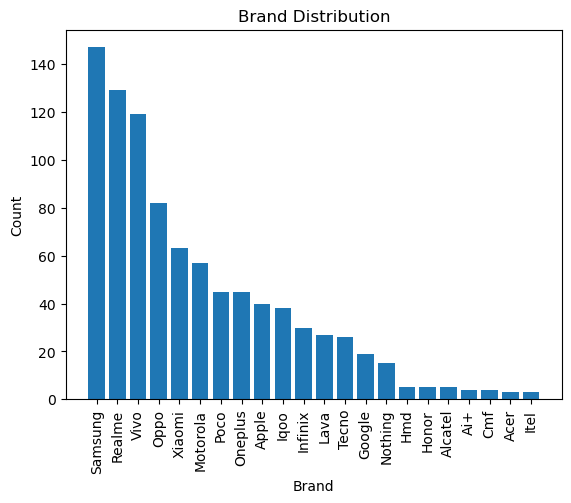

In [69]:
plt.bar(df['brand'].value_counts().index,df['brand'].value_counts().values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Distribution')

plt.xticks(rotation=90)

plt.show()

### Brand Distribution (Summary)

The plot shows that Samsung dominates the dataset, followed by Realme and Vivo.
Several brands have moderate representation, while many brands appear very rarely, indicating class imbalance across brands.
This imbalance may influence model predictions and should be considered during feature engineering.

In [45]:
df['brand'].value_counts().values

array([147, 129, 119,  82,  63,  57,  45,  45,  40,  38,  30,  27,  26,
        19,  15,   5,   5,   5,   4,   4,   3,   3], dtype=int64)

In [61]:
df.head()

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


<Axes: xlabel='price', ylabel='Count'>

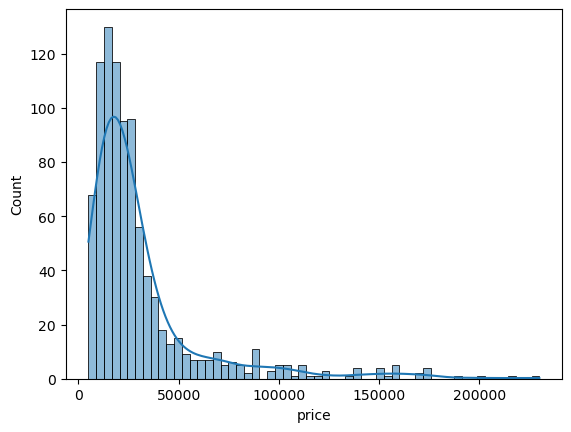

In [85]:
sns.histplot(df['price'],kde=True)

### Price Distribution (Target Variable)

The distribution of the price column is right-skewed, with most values concentrated in the lower price range and a long tail toward higher prices.
This indicates the presence of outliers

So we use log transform

<Axes: xlabel='price', ylabel='Count'>

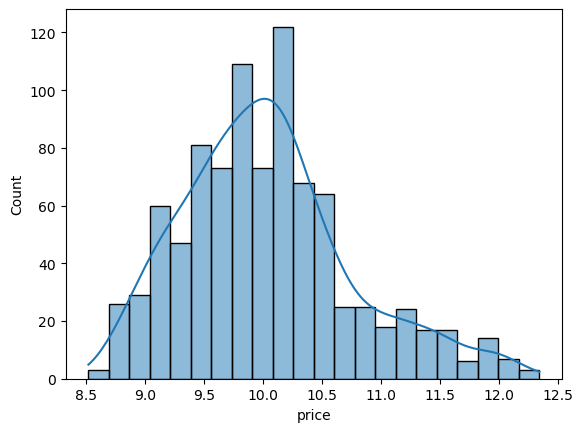

In [83]:
sns.histplot(np.log1p(df['price']),kde=True)

after log transform the data is nearly normalize

<Axes: xlabel='price'>

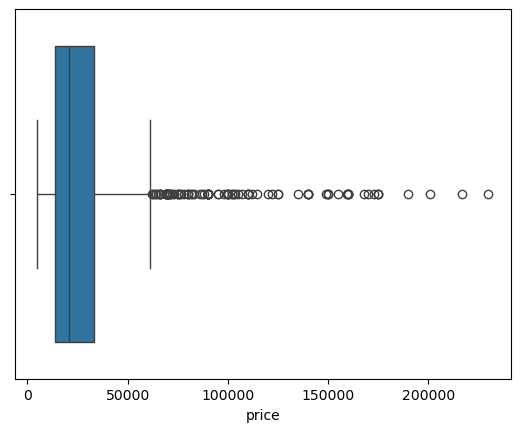

In [100]:
sns.boxplot(x=df['price'])

<Axes: xlabel='price'>

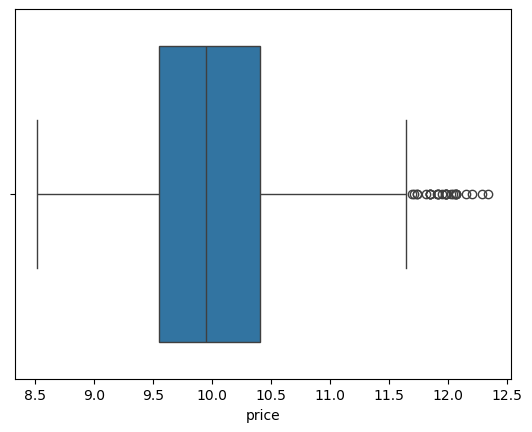

In [102]:
sns.boxplot(x=np.log1p(df['price']))

### reting column

In [92]:
df['reting'].value_counts()

reting
84.00    153
82.00    148
83.00    128
85.00    105
80.00     67
81.00     66
86.00     38
87.00     38
2.60      29
89.00     24
41.30     22
88.00     19
91.00     17
90.00     14
81.50     10
85.02      6
93.00      6
92.00      5
95.00      4
94.00      4
7.00       3
78.85      2
8.00       1
97.00      1
96.00      1
Name: count, dtype: int64

In [94]:
df['reting'].describe()

count    911.000000
mean      80.016268
std       16.532397
min        2.600000
25%       82.000000
50%       83.000000
75%       85.000000
max       97.000000
Name: reting, dtype: float64

<Axes: xlabel='reting', ylabel='Count'>

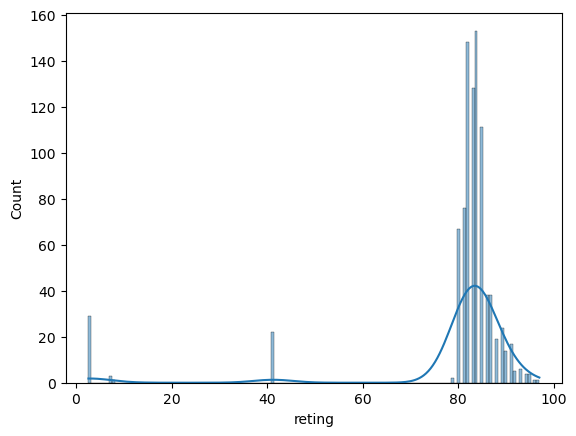

In [108]:
sns.histplot(df['reting'],kde=True)

<Axes: xlabel='reting'>

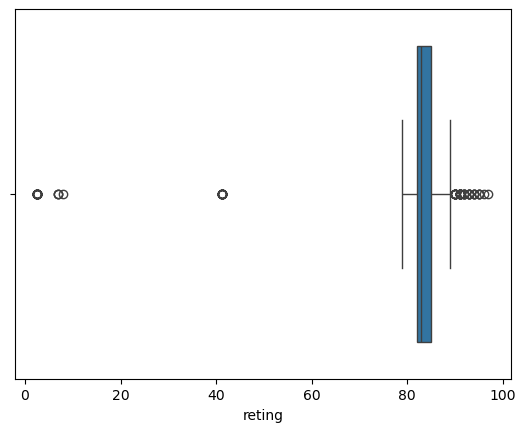

In [110]:
sns.boxplot(x = df['reting'])

In [300]:
Q1 = df['reting'].quantile(0.25)
Q3 = df['reting'].quantile(0.75)
IQR = Q2 - Q1
print("Q1 :",Q1)
print("Q2 :",Q3)
print("IQR :",IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound :",lower_bound)
print("Upper bound :",upper_bound)

Q1 : 82.0
Q2 : 85.0
IQR : -2.0
Lower bound : 85.0
Upper bound : 82.0


### Rating Distribution (Summary)

Most ratings lie between 75 and 90, with a few low-value outliers below 10, indicating possible anomalies that may need cleaning before modeling.

In [116]:
df[df['reting']<10]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
22,Apple,82900,2.6,1,1.0,0,Bionic,6,2.60,8.0,256,3692,1,40,48,18,iOS,6.30,120
41,Realme,24999,2.6,1,0.0,1,Snapdragon,8,2.60,8.0,128,7000,1,80,50,50,Android,6.80,144
106,Vivo,14999,2.6,1,0.0,0,Dimensity,8,2.60,4.0,128,6500,1,44,50,8,Android,6.68,120
117,Realme,23999,2.6,1,0.0,0,Dimensity,8,2.60,8.0,128,7000,1,80,50,50,Android,6.80,144
118,Ai+,7999,2.6,1,0.0,0,Unisoc,8,2.60,6.0,128,5000,1,18,50,5,Android,6.75,120
130,Ai+,4999,2.6,0,0.0,0,Unisoc,8,1.80,4.0,64,5000,1,10,50,5,Android,6.75,90
164,Realme,26999,2.6,1,0.0,1,Snapdragon,8,2.60,8.0,256,7000,1,80,50,50,Android,6.80,144
173,Google,69390,8.0,1,1.0,0,Tensor,8,3.48,12.0,256,4970,1,30,48,11,Android,6.30,120
198,Vivo,20999,2.6,1,0.0,1,Dimensity,8,2.60,8.0,256,6500,1,44,50,8,Android,6.72,120
247,Apple,119900,2.6,1,1.0,0,Bionic,6,2.60,8.0,256,3149,1,20,48,18,iOS,6.50,60


Rating Cleaning & Imputation

Ratings below 10 were treated as invalid values and replaced with NaN.
These missing ratings were then filled using the average rating of the corresponding phone brand, ensuring consistency and reducing noise in the data.

In [120]:
df[df['reting']<10].shape

(33, 19)

In [128]:
df.loc[df['reting']<10,'reting'] = np.nan

df['reting'].isnull().sum()

In [142]:
df['reting']  = df.groupby('brand')['reting'].transform(lambda x:x.fillna(round(x.mean(),2)))

In [144]:
df['reting'].isnull().sum()

10

Handling Low & Missing Ratings

Ratings below 10 were first treated as invalid and set to NaN.
Since some brands had very few phones, their missing ratings could not be reliably imputed using brand-wise averages, so those rows were removed from the dataset.

In [156]:
df[df['reting'].isnull()]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
118,Ai+,7999,NaN,1,0.0,0,Unisoc,8,2.6,6.0,128,5000,1,18,50,5,Android,6.75,120
130,Ai+,4999,NaN,0,0.0,0,Unisoc,8,1.8,4.0,64,5000,1,10,50,5,Android,6.75,90
341,Ai+,6999,NaN,0,0.0,0,Unisoc,8,1.8,6.0,128,5000,1,10,50,5,Android,6.75,90
342,Ai+,9499,NaN,1,0.0,0,Unisoc,8,2.6,8.0,128,5000,1,18,50,5,Android,6.75,120
539,Acer,11998,NaN,1,0.0,0,Dimensity,8,2.4,8.0,128,5000,1,33,64,13,Android,6.80,120
542,Acer,9998,NaN,1,0.0,0,Dimensity,8,2.4,4.0,128,5000,1,33,64,13,Android,6.80,120
658,Acer,10998,NaN,1,0.0,0,Dimensity,8,2.4,6.0,128,5000,1,33,64,13,Android,6.80,120
758,Itel,5748,NaN,0,0.0,0,Unisoc,8,2.6,3.0,64,5000,1,15,13,5,Android,6.60,90
773,Itel,6435,NaN,0,0.0,0,Unisoc,8,1.8,4.0,64,5000,1,15,13,5,Android,6.60,90
817,Itel,8499,NaN,0,0.0,0,Helio,8,2.0,8.0,128,5000,1,18,108,8,Android,6.60,90


In [152]:
df['brand'].value_counts()

brand
Samsung     147
Realme      129
Vivo        119
Oppo         82
Xiaomi       63
Motorola     57
Poco         45
Oneplus      45
Apple        40
Iqoo         38
Infinix      30
Lava         27
Tecno        26
Google       19
Nothing      15
Hmd           5
Honor         5
Alcatel       5
Ai+           4
Cmf           4
Acer          3
Itel          3
Name: count, dtype: int64

In [166]:
df[~df['reting'].isnull()]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,Iqoo,27999,80.0,1,0.0,1,Snapdragon,8,3.20,8.0,128,4700,1,80,64,16,Android,6.62,120
907,Xiaomi,13980,80.0,0,0.0,1,Helio,8,2.05,8.0,128,5000,1,33,64,13,Android,6.43,60
908,Xiaomi,16499,84.0,1,0.0,1,Dimensity,8,2.40,6.0,128,5000,1,33,50,16,Android,6.60,90
909,Realme,27990,82.0,1,0.0,0,Dimensity,8,2.50,6.0,128,4500,1,60,50,16,Android,6.40,90


In [168]:
df = df[~df['reting'].isnull()]

<Axes: xlabel='reting', ylabel='Count'>

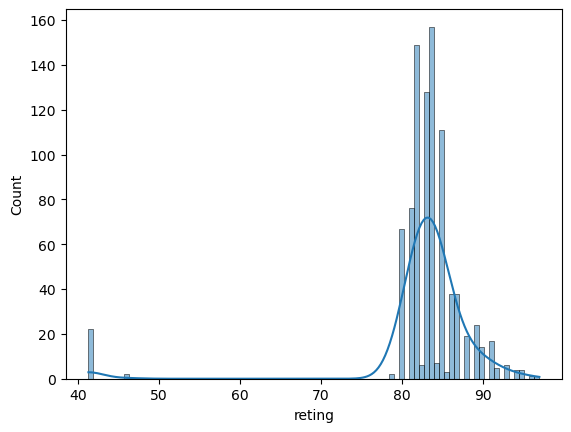

In [170]:
sns.histplot(df['reting'],kde=True)

<Axes: xlabel='reting'>

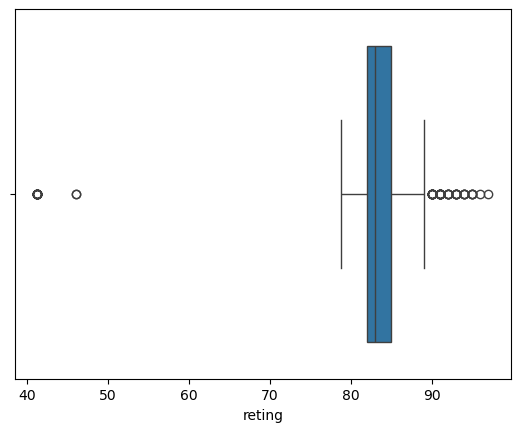

In [172]:
sns.boxplot(x = df['reting'])

In [178]:
df[df['reting']<50]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
154,Lava,12999,41.30,1,0.0,0,Dimensity,8,2.5,6.0,128,5000,1,33,64,13,Android,6.67,120
215,Lava,6999,41.30,1,0.0,0,Unisoc,8,2.3,4.0,64,5000,1,10,13,5,Android,6.75,60
302,Lava,9999,41.30,1,0.0,0,Dimensity,8,2.6,6.0,128,5000,1,18,50,8,Android,6.75,120
303,Lava,10999,41.30,1,0.0,0,Dimensity,8,2.4,4.0,128,5000,1,33,64,16,Android,6.67,120
409,Lava,13499,41.30,1,0.0,0,Dimensity,8,2.6,6.0,128,5000,0,20,50,8,Android,6.67,120
410,Lava,12499,41.30,1,0.0,0,Dimensity,8,2.6,8.0,256,5000,1,18,50,8,Android,6.75,120
454,Lava,7499,41.30,1,0.0,0,Unisoc,8,2.3,4.0,128,5000,1,10,13,5,Android,6.75,60
464,Lava,14799,41.30,1,0.0,0,Dimensity,8,2.5,6.0,128,5000,1,33,64,16,Android,6.67,120
490,Lava,8499,41.30,1,0.0,0,Dimensity,8,2.5,4.0,128,5000,1,20,50,5,Android,6.75,120
492,Lava,7999,41.30,1,0.0,0,Dimensity,8,2.5,4.0,64,5000,1,20,50,5,Android,6.75,120


In [188]:
df.head()

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


### is_5g column

In [191]:
df['is_5g'].value_counts()

is_5g
1    812
0     89
Name: count, dtype: int64

<BarContainer object of 2 artists>

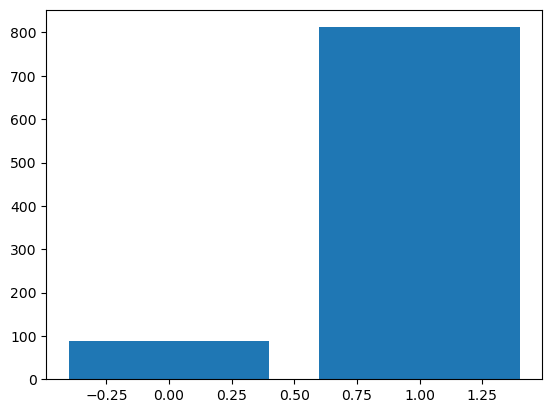

In [195]:
plt.bar(df['is_5g'].value_counts().index,df['is_5g'].value_counts().values)

<Axes: xlabel='is_5g'>

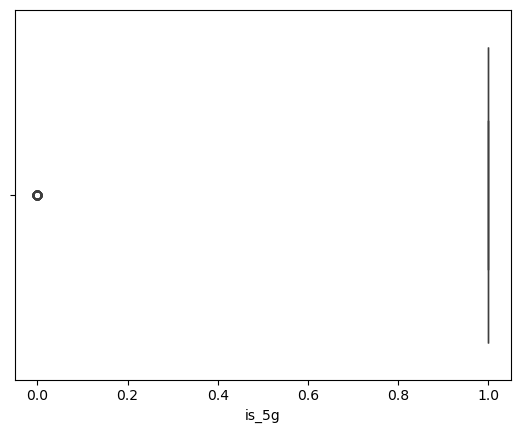

In [236]:
sns.boxplot(x=df['is_5g'])

### is_nfc

In [198]:
df['is_nfc'].value_counts()

is_nfc
0.0    497
1.0    404
Name: count, dtype: int64

<BarContainer object of 2 artists>

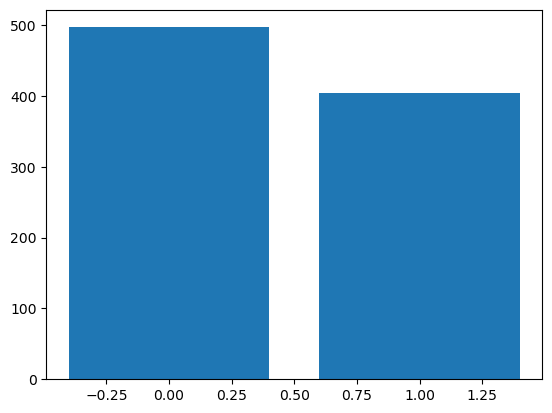

In [200]:
plt.bar(df['is_nfc'].value_counts().index,df['is_nfc'].value_counts().values)

In [202]:
df.head(2)

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120


### processor_brand

In [205]:
df['processor_brand'].value_counts()

processor_brand
Dimensity     390
Snapdragon    326
Exynos         58
Bionic         40
Helio          35
Unisoc         31
Tensor         19
Tiger           2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Dimensity'),
  Text(1, 0, 'Snapdragon'),
  Text(2, 0, 'Exynos'),
  Text(3, 0, 'Bionic'),
  Text(4, 0, 'Helio'),
  Text(5, 0, 'Unisoc'),
  Text(6, 0, 'Tensor'),
  Text(7, 0, 'Tiger')])

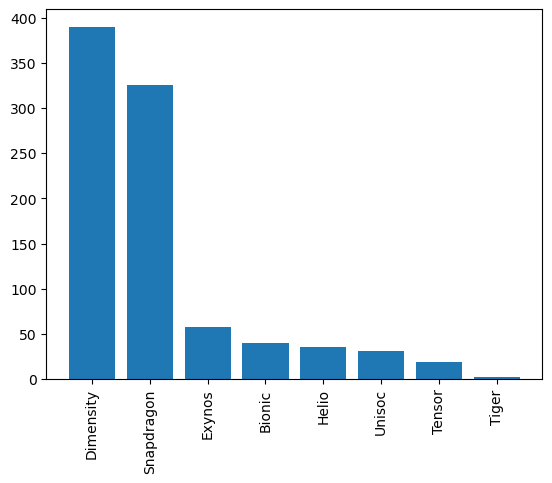

In [209]:
plt.bar(df['processor_brand'].value_counts().index,df['processor_brand'].value_counts().values)
plt.xticks(rotation=90)

### core

In [212]:
df['core'].value_counts()

core
8     846
6      40
10     11
9       4
Name: count, dtype: int64

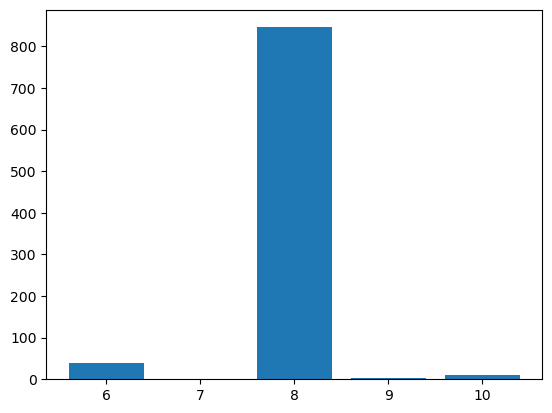

In [218]:
plt.bar(df['core'].value_counts().index,df['core'].value_counts().values)
plt.show()

### ram

In [223]:
df['ram'].value_counts()

ram
8.0     426
12.0    183
6.0     130
4.0     122
16.0     32
3.0       7
24.0      1
Name: count, dtype: int64

<BarContainer object of 7 artists>

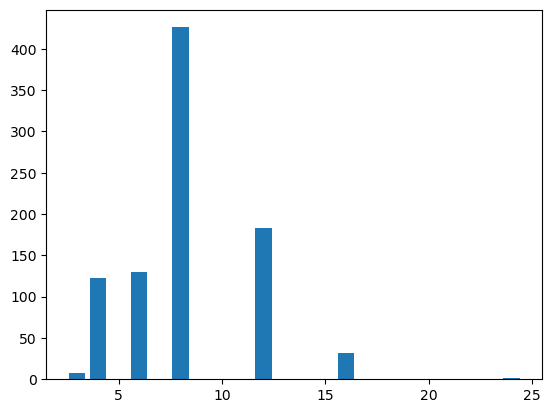

In [225]:
plt.bar(df['ram'].value_counts().index,df['ram'].value_counts().values)


In [227]:
df.head(2)

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120


### internal_memory

In [230]:
df['internal_memory'].value_counts()

internal_memory
128     420
256     323
512      79
64       66
1024     11
2         1
32        1
Name: count, dtype: int64

<BarContainer object of 7 artists>

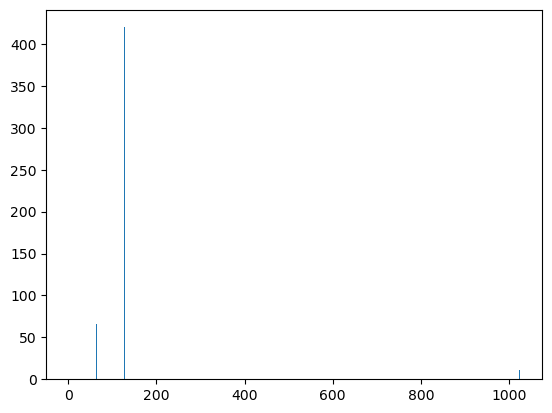

In [240]:
plt.bar(df['internal_memory'].value_counts().index,df['internal_memory'].value_counts().values)

<Axes: xlabel='internal_memory'>

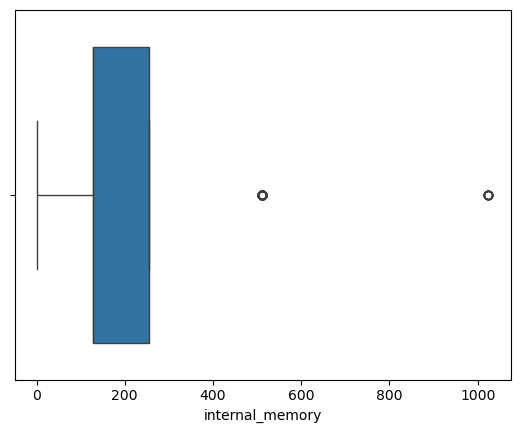

In [270]:
sns.boxplot(x=df['internal_memory'])

In [242]:
df[df['internal_memory']>1000]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
226,Oneplus,81999,93.00,1,1.0,1,Snapdragon,8,4.32,24.0,1024,6000,1,100,50,32,Android,6.82,120
263,Apple,189900,83.00,1,1.0,0,Bionic,6,2.60,12.0,1024,4832,1,20,48,18,iOS,6.90,120
280,Samsung,216999,97.00,1,1.0,0,Snapdragon,8,4.47,16.0,1024,4400,1,25,200,10,Android,8.00,120
348,Samsung,159499,94.00,1,1.0,0,Snapdragon,8,4.47,12.0,1024,5000,1,45,200,12,Android,6.90,120
361,Samsung,159999,94.00,1,1.0,0,Snapdragon,8,3.30,12.0,1024,5000,1,45,200,12,Android,6.80,120
506,Oneplus,149998,94.00,1,1.0,1,Snapdragon,8,3.20,16.0,1024,4805,1,67,64,32,Android,7.82,120
603,Apple,167900,89.00,1,1.0,0,Bionic,6,4.05,8.0,1024,4685,1,20,48,12,iOS,6.90,120
654,Apple,174900,83.00,1,1.0,0,Bionic,6,2.60,12.0,1024,3988,1,20,48,18,iOS,6.30,120
756,Apple,159900,84.09,1,1.0,0,Bionic,6,2.60,8.0,1024,3149,1,20,48,18,iOS,6.50,60
782,Apple,159900,89.00,1,1.0,0,Bionic,6,4.05,8.0,1024,3582,1,20,48,12,iOS,6.30,120


data is right 

In [245]:
df.head(2)

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120


### battery_size

In [258]:
df['battery_size'].value_counts().sort_index(ascending=False)

battery_size
7550     2
7300     6
7100     3
7000    50
6800     3
        ..
3279     2
3274     1
3240     1
3149     3
2716     1
Name: count, Length: 79, dtype: int64

(0.0, 100.0)

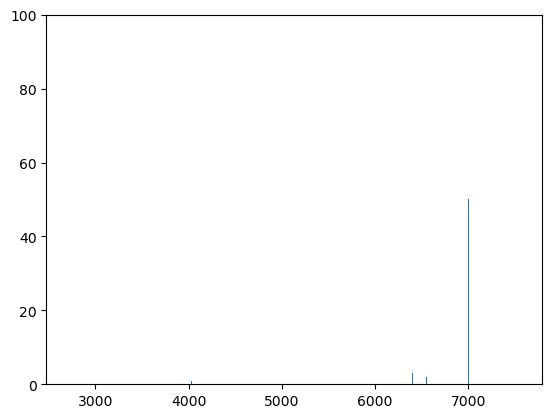

In [266]:
plt.bar(df['battery_size'].value_counts().index,df['battery_size'].value_counts().values)
plt.ylim(0,100)

<Axes: xlabel='battery_size'>

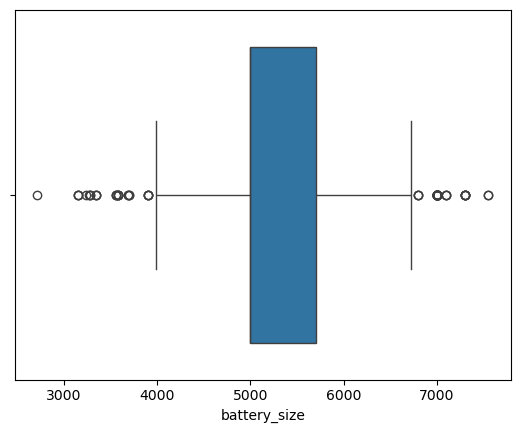

In [268]:
sns.boxplot(x=df['battery_size'])

In [272]:
df[df['battery_size']<3000]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
754,Apple,69873,83.0,0,1.0,0,Bionic,6,2.39,3.0,64,2716,1,20,12,7,iOS,5.8,60


In [274]:
df.head(2)

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120


### fast_charge

In [277]:
df['fast_charge'].value_counts()

fast_charge
1    897
0      4
Name: count, dtype: int64

In [279]:
df[df['fast_charge']==0]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
409,Lava,13499,41.3,1,0.0,0,Dimensity,8,2.6,6.0,128,5000,0,20,50,8,Android,6.67,120
739,Motorola,6998,83.0,0,0.0,0,Tiger,8,1.8,4.0,64,5000,0,20,48,8,Android,6.50,90
761,Lava,13499,41.3,0,0.0,0,Dimensity,8,2.4,6.0,128,5000,0,20,64,16,Android,6.67,60
843,Oppo,9892,84.0,0,0.0,0,Helio,8,2.0,4.0,64,5000,0,20,8,5,Android,6.56,60


<BarContainer object of 2 artists>

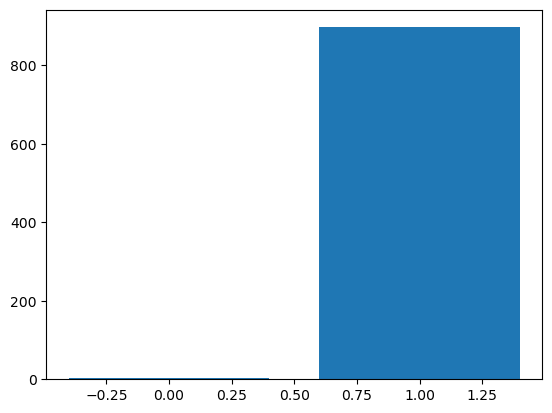

In [281]:
plt.bar(df['fast_charge'].value_counts().index,df['fast_charge'].value_counts().values)

### charging_speed

In [284]:
df['charging_speed'].value_counts()

charging_speed
45     138
80     125
25     106
33      84
18      69
20      62
44      49
90      45
15      38
120     34
67      31
100     25
30      17
68      13
10      10
65      10
66       9
50       9
60       7
70       6
35       3
37       2
27       2
125      2
40       2
150      2
23       1
Name: count, dtype: int64

<BarContainer object of 27 artists>

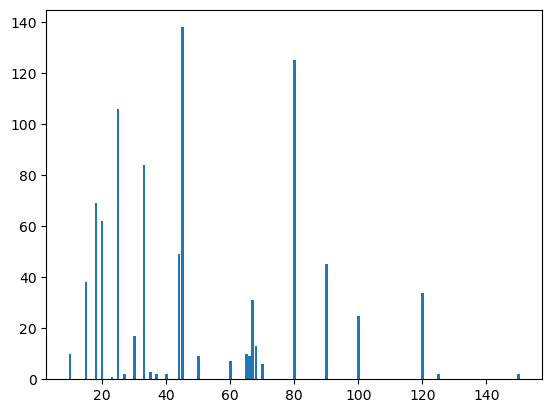

In [286]:
plt.bar(df['charging_speed'].value_counts().index,df['charging_speed'].value_counts().values)

<Axes: xlabel='charging_speed'>

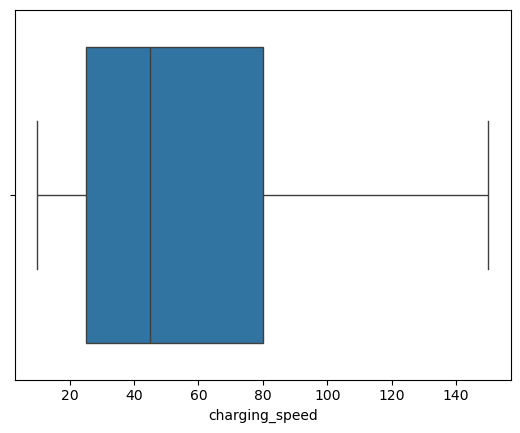

In [288]:
sns.boxplot(x=df['charging_speed'])

In [296]:
Q1 = df['charging_speed'].quantile(0.25)
Q3 = df['charging_speed'].quantile(0.75)
IQR = Q3-Q1
print("Q1 :",Q1)
print("Q2 :",Q3)
print("IQR :",IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound :",lower_bound)
print("Upper bound :",upper_bound)

Q1 : 25.0
Q2 : 80.0
IQR : 55.0
Lower bound : -57.5
Upper bound : 162.5


In [298]:
df[df['charging_speed']>162]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate


In [302]:
df[df['charging_speed']<-57.5]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate


df.head(2)

### rear_mp

In [307]:
df['rear_mp'].value_counts()

rear_mp
50     621
64      84
48      59
108     51
32      22
13      19
200     18
12      14
8        8
16       2
100      2
25       1
Name: count, dtype: int64

<BarContainer object of 12 artists>

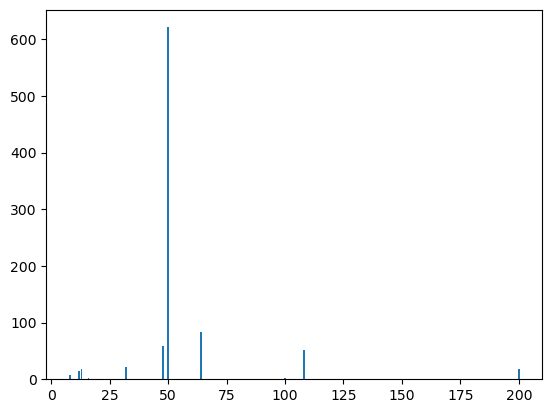

In [309]:
plt.bar(df['rear_mp'].value_counts().index,df['rear_mp'].value_counts().values)

### front_mp

In [312]:
df['front_mp'].value_counts()

front_mp
16    189
32    178
8     154
50     99
13     83
12     63
5      55
20     27
10     24
18     12
11      7
42      5
40      1
25      1
7       1
0       1
44      1
Name: count, dtype: int64

<BarContainer object of 17 artists>

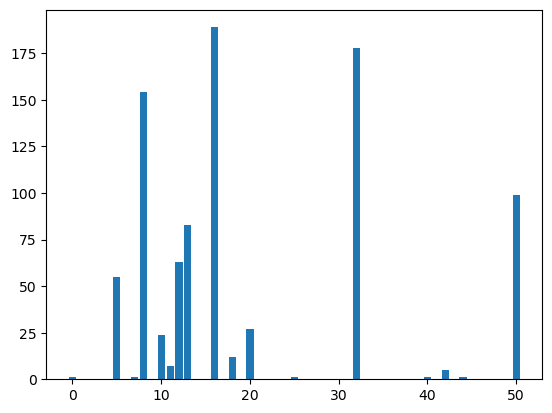

In [314]:
plt.bar(df['front_mp'].value_counts().index,df['front_mp'].value_counts().values)

### os

In [319]:
df['os'].value_counts()

os
Android    861
iOS         40
Name: count, dtype: int64

### display_size

In [322]:
df['display_size'].value_counts()

display_size
6.67    164
6.70    145
6.78     98
6.77     52
6.74     42
6.72     32
6.80     31
6.50     27
6.90     25
6.60     24
6.55     20
6.83     19
6.10     19
6.43     18
6.56     18
6.30     17
6.88     14
6.40     13
6.75     12
6.59     11
6.79     10
6.20      8
6.57      8
6.82      7
6.68      7
6.58      7
7.60      6
6.38      5
6.71      4
6.45      4
6.44      4
6.47      3
8.00      3
8.03      3
6.62      3
6.81      3
6.73      2
6.31      2
6.32      2
7.82      1
7.85      1
6.96      1
6.14      1
6.36      1
6.53      1
6.08      1
6.26      1
5.80      1
Name: count, dtype: int64

In [324]:
df['display_size'].describe()

count    901.000000
mean       6.682142
std        0.214022
min        5.800000
25%        6.670000
50%        6.700000
75%        6.770000
max        8.030000
Name: display_size, dtype: float64

<Axes: xlabel='display_size'>

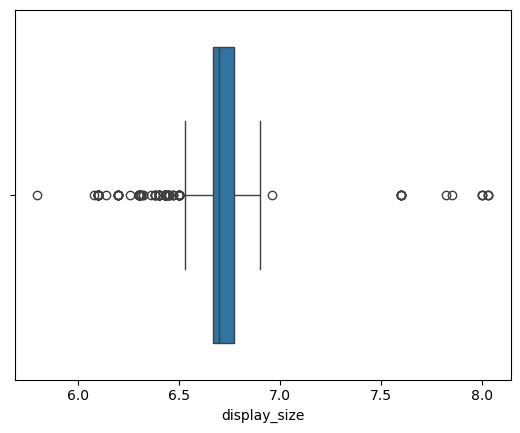

In [328]:
sns.boxplot(x = df['display_size'])

In [330]:
Q1 = df['display_size'].quantile(0.25)
Q3 = df['display_size'].quantile(0.75)
IQR = Q3-Q1
print("Q1 :",Q1)
print("Q2 :",Q3)
print("IQR :",IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound :",lower_bound)
print("Upper bound :",upper_bound)

Q1 : 6.67
Q2 : 6.77
IQR : 0.09999999999999964
Lower bound : 6.5200000000000005
Upper bound : 6.919999999999999


In [332]:
df[df['display_size']>7.5]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
218,Samsung,174999,95.0,1,1.0,0,Snapdragon,8,4.47,12.0,256,4400,1,25,200,10,Android,8.00,120
280,Samsung,216999,97.0,1,1.0,0,Snapdragon,8,4.47,16.0,1024,4400,1,25,200,10,Android,8.00,120
381,Samsung,103399,90.0,1,1.0,0,Snapdragon,8,3.39,12.0,256,4400,1,25,50,10,Android,7.60,120
440,Google,172999,91.0,1,1.0,0,Tensor,8,3.10,16.0,256,4650,1,20,48,10,Android,8.03,120
476,Tecno,89999,95.0,1,1.0,0,Dimensity,8,3.20,12.0,512,5750,1,70,50,32,Android,7.85,120
488,Samsung,174999,95.0,1,1.0,0,Snapdragon,8,4.47,12.0,512,4400,1,25,200,10,Android,8.00,120
506,Oneplus,149998,94.0,1,1.0,1,Snapdragon,8,3.20,16.0,1024,4805,1,67,64,32,Android,7.82,120
517,Vivo,159999,96.0,1,1.0,1,Snapdragon,8,3.30,16.0,512,5700,1,100,64,32,Android,8.03,120
551,Vivo,149998,94.0,1,1.0,1,Snapdragon,8,3.30,16.0,512,6000,1,80,50,20,Android,8.03,120
646,Samsung,94990,89.0,1,1.0,0,Snapdragon,8,3.20,12.0,256,4400,1,25,50,10,Android,7.60,120


### refresh_rate

In [335]:
df['refresh_rate'].value_counts()

refresh_rate
120    629
90     136
60      67
144     67
165      2
Name: count, dtype: int64

<BarContainer object of 5 artists>

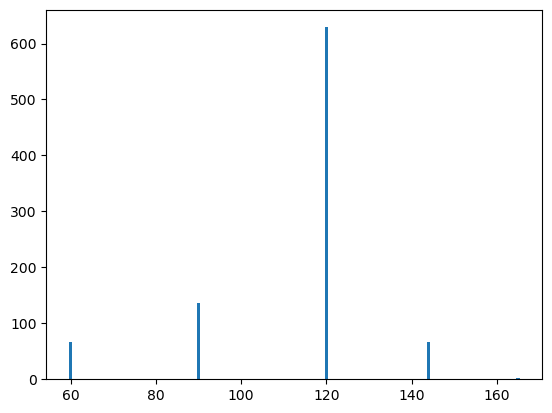

In [337]:
plt.bar(df['refresh_rate'].value_counts().index,df['refresh_rate'].value_counts().values)

In [339]:
df['refresh_rate'].describe()

count    901.000000
mean     112.894562
std       20.020905
min       60.000000
25%      120.000000
50%      120.000000
75%      120.000000
max      165.000000
Name: refresh_rate, dtype: float64

<Axes: xlabel='refresh_rate'>

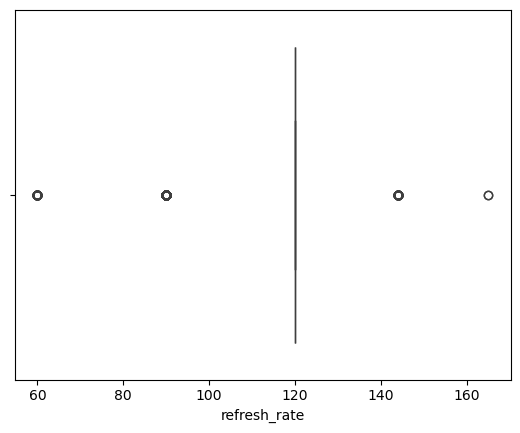

In [343]:
sns.boxplot(x=df['refresh_rate'])

In [345]:
df.head()

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


In [349]:
df.to_csv("after_EDA_dataset.csv",index=False)